In [1]:
import pandas as pd
import numpy as np

In [2]:
link = "https://www.bbc.com/sport/football/spanish-la-liga/table"

In [3]:
league_data = pd.read_html(link)[0]

In [6]:
league_data = league_data.loc[0:19,"Team":"Pts"]
league_data

,Team,P,W,D,L,F,A,GD,Pts
0,Celta Vigo,1,0,1,0,0,0,0,1
1,Eibar,1,0,1,0,0,0,0,1
2,AlavÃ©s,0,0,0,0,0,0,0,0
3,Ath Bilbao,0,0,0,0,0,0,0,0
4,Atl Madrid,0,0,0,0,0,0,0,0
5,Barcelona,0,0,0,0,0,0,0,0
6,CÃ¡diz,0,0,0,0,0,0,0,0
7,Elche,0,0,0,0,0,0,0,0
8,Getafe,0,0,0,0,0,0,0,0
9,Granada,0,0,0,0,0,0,0,0


In [7]:
league_data.set_index("Team",inplace=True)

In [9]:
features = ["P","W","D","L","F","A","GD","Pts"]

for feature in features:
    league_data[feature] = league_data[feature].astype("int")
    
    

## Feature Engineering

In [11]:
league_data["win_ratio"] = round(league_data.W/league_data.P,2)

In [12]:
league_data["draw_ratio"] = round(league_data.D/league_data.P,2)

In [13]:
league_data["loss_ratio"] = round(league_data.L/league_data.P,2)

In [14]:
league_data["goals_scored_per_game_ratio"] = round((league_data.F/league_data.P),2)

In [15]:
league_data["total_goals_per_game_ratio"] = round(((league_data.F + league_data.A)/league_data.P),2)

In [16]:
league_data.replace(np.inf, 0,inplace=True)

In [17]:
league_data.fillna(0,inplace=True)

In [18]:
league_data

,P,W,D,L,F,A,GD,Pts,win_ratio,draw_ratio,loss_ratio,goals_scored_per_game_ratio,total_goals_per_game_ratio
Team,,,,,,,,,,,,,
Celta Vigo,1,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0
Eibar,1,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0
AlavÃ©s,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Ath Bilbao,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Atl Madrid,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Barcelona,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
CÃ¡diz,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Elche,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
Getafe,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [19]:
import matplotlib.pyplot as plt

## Win Ratios

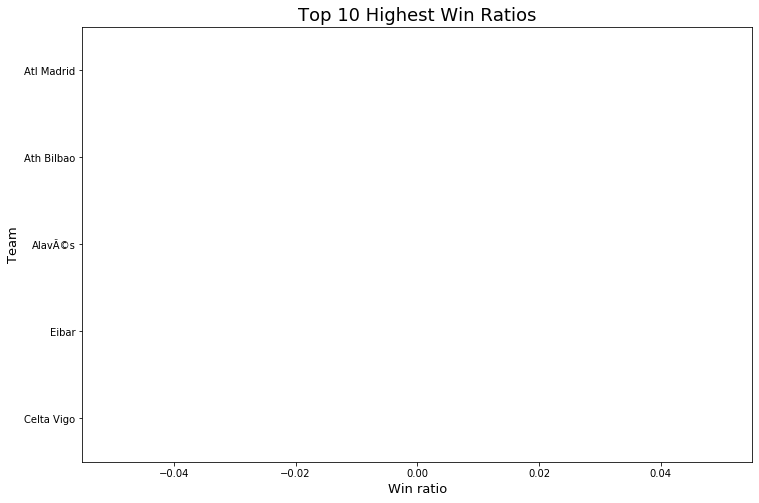

In [25]:
league_data.win_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Win ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Win Ratios",fontsize=18)
plt.show()

## Draw Ratios

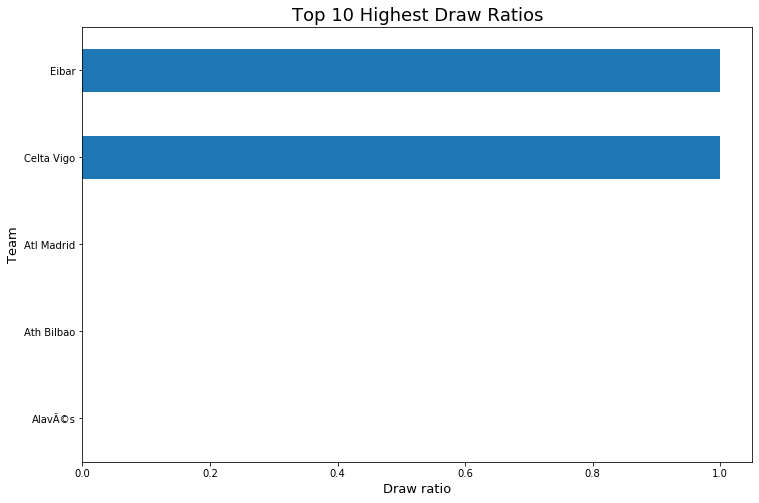

In [26]:
league_data.draw_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Draw ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Draw Ratios",fontsize=18)
plt.show()

## Loss Ratios

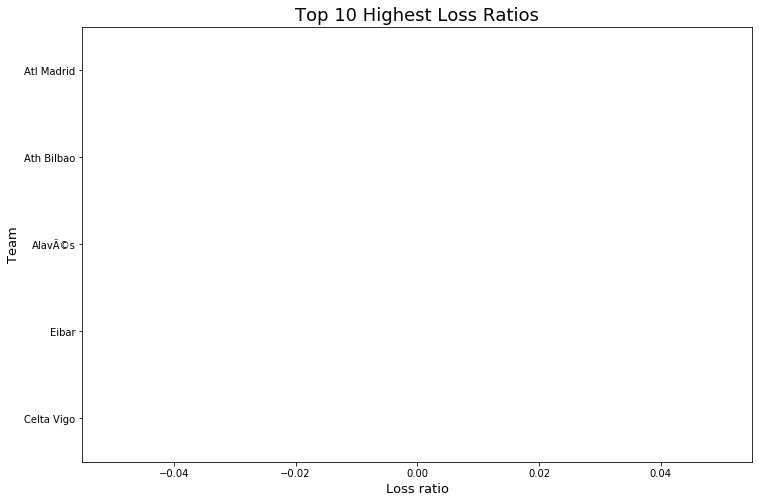

In [27]:
league_data.loss_ratio.nlargest(5).sort_values(ascending=True).plot(kind="barh",figsize=(12,8))
plt.xlabel("Loss ratio",fontsize=13)
plt.ylabel("Team",fontsize=13)
plt.title("Top 10 Highest Loss Ratios",fontsize=18)
plt.show()

## High Scoring Teams

In [28]:
high_scoring_teams = league_data["goals_scored_per_game_ratio"]
high_scoring_teams = high_scoring_teams.nlargest(5).to_frame()
high_scoring_teams

,goals_scored_per_game_ratio
Team,
Celta Vigo,0.0
Eibar,0.0
AlavÃ©s,0.0
Ath Bilbao,0.0
Atl Madrid,0.0


In [29]:
high_goals_averaging_teams = league_data["total_goals_per_game_ratio"]
high_goals_averaging_teams = high_goals_averaging_teams.nlargest(5).to_frame()
high_goals_averaging_teams

,total_goals_per_game_ratio
Team,
Celta Vigo,0.0
Eibar,0.0
AlavÃ©s,0.0
Ath Bilbao,0.0
Atl Madrid,0.0
